# Healthcare Capstone Project - Predicting Diabetes

**<u>DESCRIPTION<u>**

- The dataset used in this project is from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK).
- The objective of this project is to predict whether or not a patient has diabetes based on certain diagnostic measurements in the dataset.
- Diabetes is a chronic, costly, and consequential disease, making accurate predictions critical for patient health and well-being.
- The model built in this project aims to accurately predict diabetes status for patients in the dataset, potentially providing valuable insights for medical professionals.
- The success of this project could lead to the development of more effective diabetes diagnostic tools and treatments, improving patient outcomes and reducing the burden of diabetes on individuals and healthcare systems.

# Week 1: Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
	- Glucose   
	- BloodPressure 
	- SkinThickness
	- Insulin
	- BMI
    

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

**<u>Read Data<u>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc

In [2]:
df= pd.read_csv("health care diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**<u>Descriptive Analysis<u>**

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<u>Observation from Descriptive Analysis<u>**
- The mean glucose level of the patients is 120.89 and the mean BMI is 31.99.
- On average, patients have undergone 3.84 pregnancies.
- The minimum glucose level, blood pressure, and skin thickness values are 0, which indicates that there are some missing or - erroneous values in the dataset.
- The maximum number of pregnancies for a single patient is 17, and the maximum BMI value is 67.1.
- The target variable is Outcome, which is binary with 0 indicating no diabetes and 1 indicating diabetes. The mean value of the - outcome variable is 0.35, which suggests that approximately 35% of patients in the dataset have diabetes.
- The standard deviation of insulin is quite large at 115.24, indicating a significant amount of variability in this feature.
- The age of the patients ranges from 21 to 81 years, with a mean of 33.24.

**<u>2. Visually explore these variables using histograms. Treat the missing values accordingly.<u>**

- <u>**GLUCOSE**<u>

Text(0.5, 1.0, 'Glucose Chart')

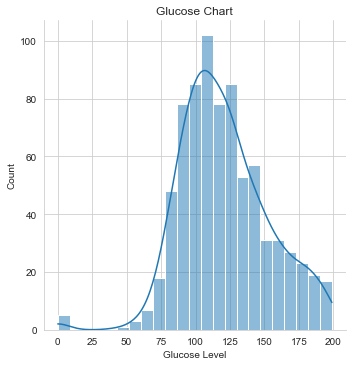

In [9]:
sns.set_style("whitegrid")
sns.displot(data=df,x="Glucose",kde=True)
plt.xlabel("Glucose Level")
plt.title("Glucose Chart")

Here most the values are between 100-125 

In [10]:
df=df.replace({"Glucose":{0:np.nan}})
mean=df["Glucose"].mean()
df["Glucose"].fillna(mean,inplace=True)

Text(0.5, 1.0, 'Glucose After Fixing Null values')

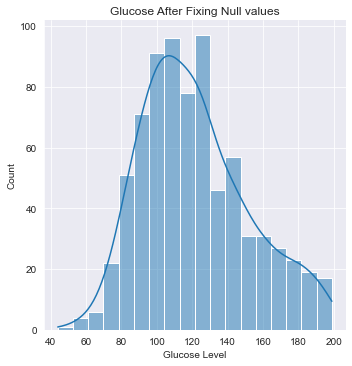

In [11]:
sns.set_style("darkgrid")
sns.displot(data=df,x="Glucose",kde=True)
plt.xlabel("Glucose Level")
plt.title("Glucose After Fixing Null values")

- **<u>BLOOD PRESSURE<u>**

Text(0.5, 6.799999999999994, 'BloodPressure level')

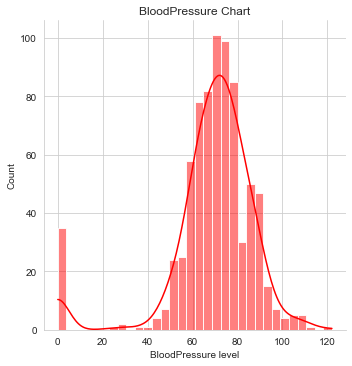

In [12]:
sns.set_style("whitegrid")
sns.displot(data=df,x="BloodPressure",kde=True,color="r")
plt.title("BloodPressure Chart")
plt.xlabel("BloodPressure level")

Here most of the data are between 60 and 80

In [13]:
df=df.replace({"BloodPressure":{0:np.nan}})
mean=df["BloodPressure"].mean()
df["BloodPressure"].replace(mean,inplace=True)

In [14]:
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())

Text(0.5, 6.799999999999994, 'BloodPressure level')

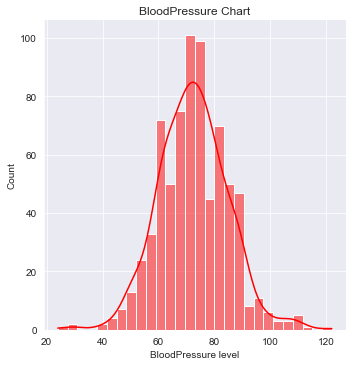

In [15]:
sns.set_style("darkgrid")
sns.displot(df["BloodPressure"],kde=True,color="r")
plt.title("BloodPressure Chart")
plt.xlabel("BloodPressure level")

- <u>**SkinThickness**<u>

Text(0.5, 6.799999999999994, 'SkinThickness Level')

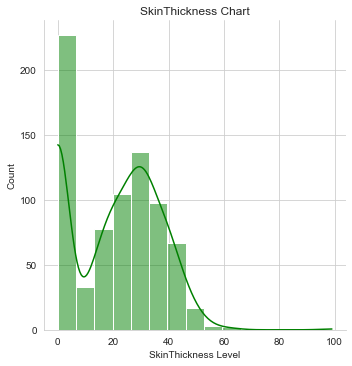

In [16]:
sns.set_style("whitegrid")
sns.displot(df["SkinThickness"],kde=True,color="green")
plt.title("SkinThickness Chart")
plt.xlabel("SkinThickness Level")

Most the values between 20 and 40. 0 wil be the null values

In [17]:
df=df.replace({"SkinThickness":{0:np.nan}})
mean=df["SkinThickness"].mean()
df["SkinThickness"].fillna(mean,inplace=True)

Text(0.5, 1.0, 'SkinThickness Level')

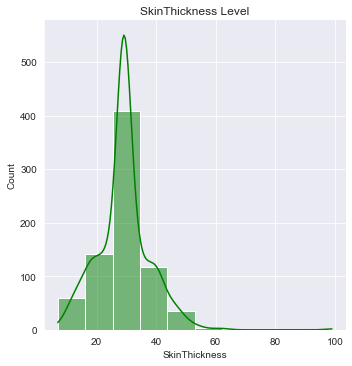

In [18]:
sns.set_style("darkgrid")
sns.displot(df["SkinThickness"],kde=True,color="green",bins=10)
plt.title("SkinThickness Chart After removing Null Values")
plt.title("SkinThickness Level")

- <u>**INSULIN**<u>

Text(0.5, 6.799999999999994, 'Insulin level')

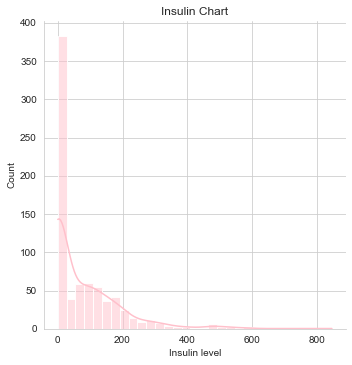

In [19]:
sns.set_style("whitegrid")
sns.displot(df["Insulin"],kde=True,color="pink")
plt.title("Insulin Chart")
plt.xlabel("Insulin level")

In [20]:
df=df.replace({"Insulin":{0:np.nan}})
mean=df["Insulin"].mean()
df["Insulin"].fillna(mean,inplace=True)

Text(0.5, 6.799999999999994, 'Insulin Level')

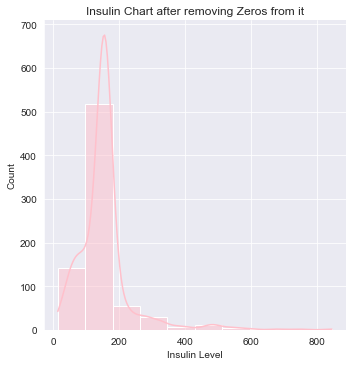

In [21]:
sns.set_style("darkgrid")
sns.displot(df["Insulin"],kde=True,color="pink",bins=10)
plt.title("Insulin Chart after removing Zeros from it")
plt.xlabel("Insulin Level")

- <u>**BMI**<u>

Text(0.5, 6.799999999999994, 'BMI Level')

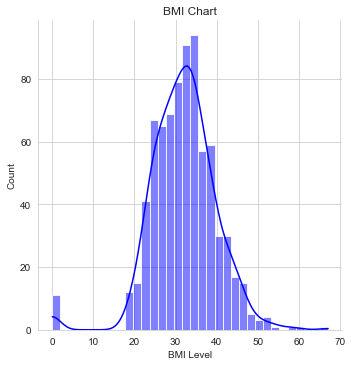

In [22]:
sns.set_style("whitegrid")
sns.displot(df["BMI"],kde=True,color="blue")
plt.title("BMI Chart")
plt.xlabel("BMI Level")

In [23]:
df=df.replace({"BMI":{0:np.nan}})
mean=df["BMI"].mean()
df["BMI"].fillna(mean,inplace=True)

Text(0.5, 6.799999999999994, 'BMI Level')

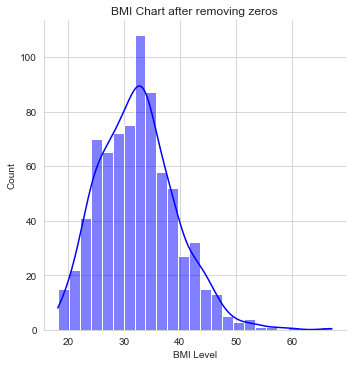

In [24]:
sns.set_style("whitegrid")
sns.displot(df["BMI"],kde=True,color="blue")
plt.title("BMI Chart after removing zeros")
plt.xlabel("BMI Level")

<AxesSubplot:>

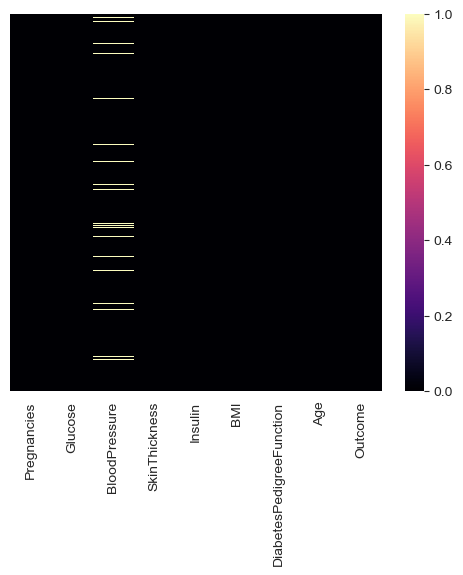

In [25]:
plt.figure(figsize=(6,5),dpi=100)
sns.heatmap(df.isnull(),cmap="magma",yticklabels=False)

In [26]:
df["BloodPressure"].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [27]:
df["BloodPressure"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 768, dtype: bool

In [28]:
df["BloodPressure"].isnull().sum()

35

In [29]:
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,29.15342,155.548223,35.300000,0.134,29,0
15,7,100.0,NaN,29.15342,155.548223,30.000000,0.484,32,1
49,7,105.0,NaN,29.15342,155.548223,32.457464,0.305,24,0
60,2,84.0,NaN,29.15342,155.548223,32.457464,0.304,21,0
78,0,131.0,NaN,29.15342,155.548223,43.200000,0.270,26,1
81,2,74.0,NaN,29.15342,155.548223,32.457464,0.102,22,0
172,2,87.0,NaN,23.00000,155.548223,28.900000,0.773,25,0
193,11,135.0,NaN,29.15342,155.548223,52.300000,0.578,40,1
222,7,119.0,NaN,29.15342,155.548223,25.200000,0.209,37,0
261,3,141.0,NaN,29.15342,155.548223,30.000000,0.761,27,1


There are 35 Null values, Replacing that with mean

In [30]:
mean_value = df['BloodPressure'].mean()
df['BloodPressure'].fillna(mean_value, inplace=True)

Text(0.5, 1.0, 'df After Removing Null Values')

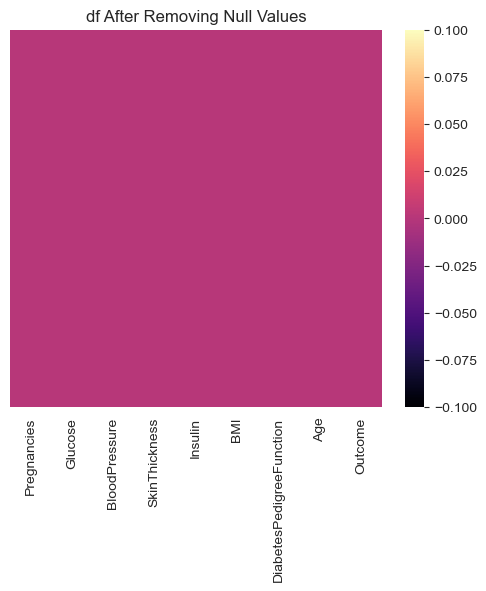

In [31]:
plt.figure(figsize=(6,5),dpi=100)
sns.heatmap(df.isnull(),cmap="magma",yticklabels=False)
plt.title("df After Removing Null Values")

In [32]:
for i in df.columns:
    print("Column Names",i,"has total values of",len(df[i].unique()))
    print(df[i].unique)
    print("-"*100)

Column Names Pregnancies has total values of 17
<bound method Series.unique of 0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64>
----------------------------------------------------------------------------------------------------
Column Names Glucose has total values of 136
<bound method Series.unique of 0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64>
----------------------------------------------------------------------------------------------------
Column Names BloodPressure has total values of 47
<bound method Series.unique of 0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64>
-------------------------------------

<u>**3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables**.<u>

In [33]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

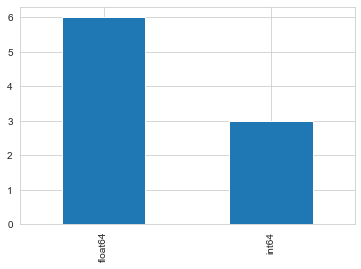

In [34]:
df.dtypes.value_counts().plot(kind="bar")

# Project Task: Week 2

**<u>Data Exploration:<u>**

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

**<u>1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action<u>**

In [35]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

([<matplotlib.axis.XTick at 0x147539997f0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

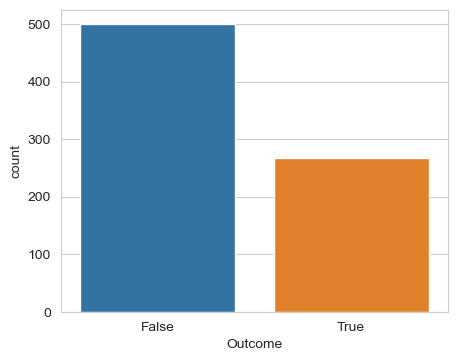

In [36]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(data=df,x="Outcome")
plt.xticks([0,1],["False","True"])

**<u>2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.**<u>

([<matplotlib.axis.XTick at 0x147539ef280>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

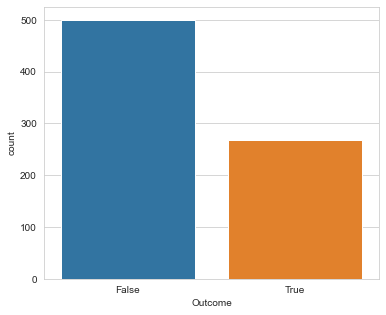

In [37]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x="Outcome")
plt.xticks([0,1],["False","True"])

Since We can see there is a imbalance in dataset. We can treat this imbalance with oversampling method.

In [38]:
df_X=df.drop("Outcome",axis=1)
df_y=df["Outcome"]
print(df_X.shape,df_y.shape)

(768, 8) (768,)


In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
df_X_resample,df_y_resample=SMOTE(random_state=1).fit_resample(df_X,df_y)
print(df_X_resample.shape,df_y_resample.shape)

(1000, 8) (1000,)


1    500
0    500
Name: Outcome, dtype: int64

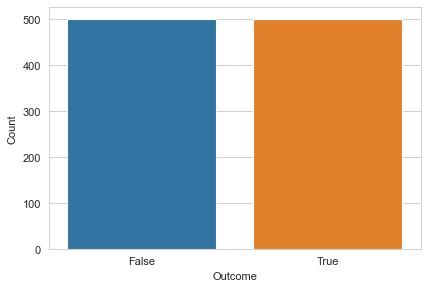

In [42]:
plt.figure(dpi=80)
sns.countplot(data=df,x=df_y_resample)
plt.xticks([0,1],["False","True"])
plt.xlabel("Outcome")
plt.ylabel("Count")
df_y_resample.value_counts()

2. **<u>Create scatter charts between the pair of variables to understand the relationships. Describe your findings.**<u>

In [43]:
df_resample=pd.concat([df_X_resample,df_y_resample],axis=1)
df_resample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [44]:
df_resample.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
995,6,160.662844,54.828555,31.764145,173.388314,30.698853,0.550466,39,1
996,3,105.459916,84.965643,29.571862,155.548223,31.640265,0.513635,36,1
997,12,133.860848,69.388814,37.195084,114.583897,37.527830,0.240400,43,1
998,12,151.145331,104.860442,30.911222,151.184896,39.695226,0.255629,47,1
999,1,138.638725,56.167648,31.265641,159.685461,28.851472,0.449688,21,1


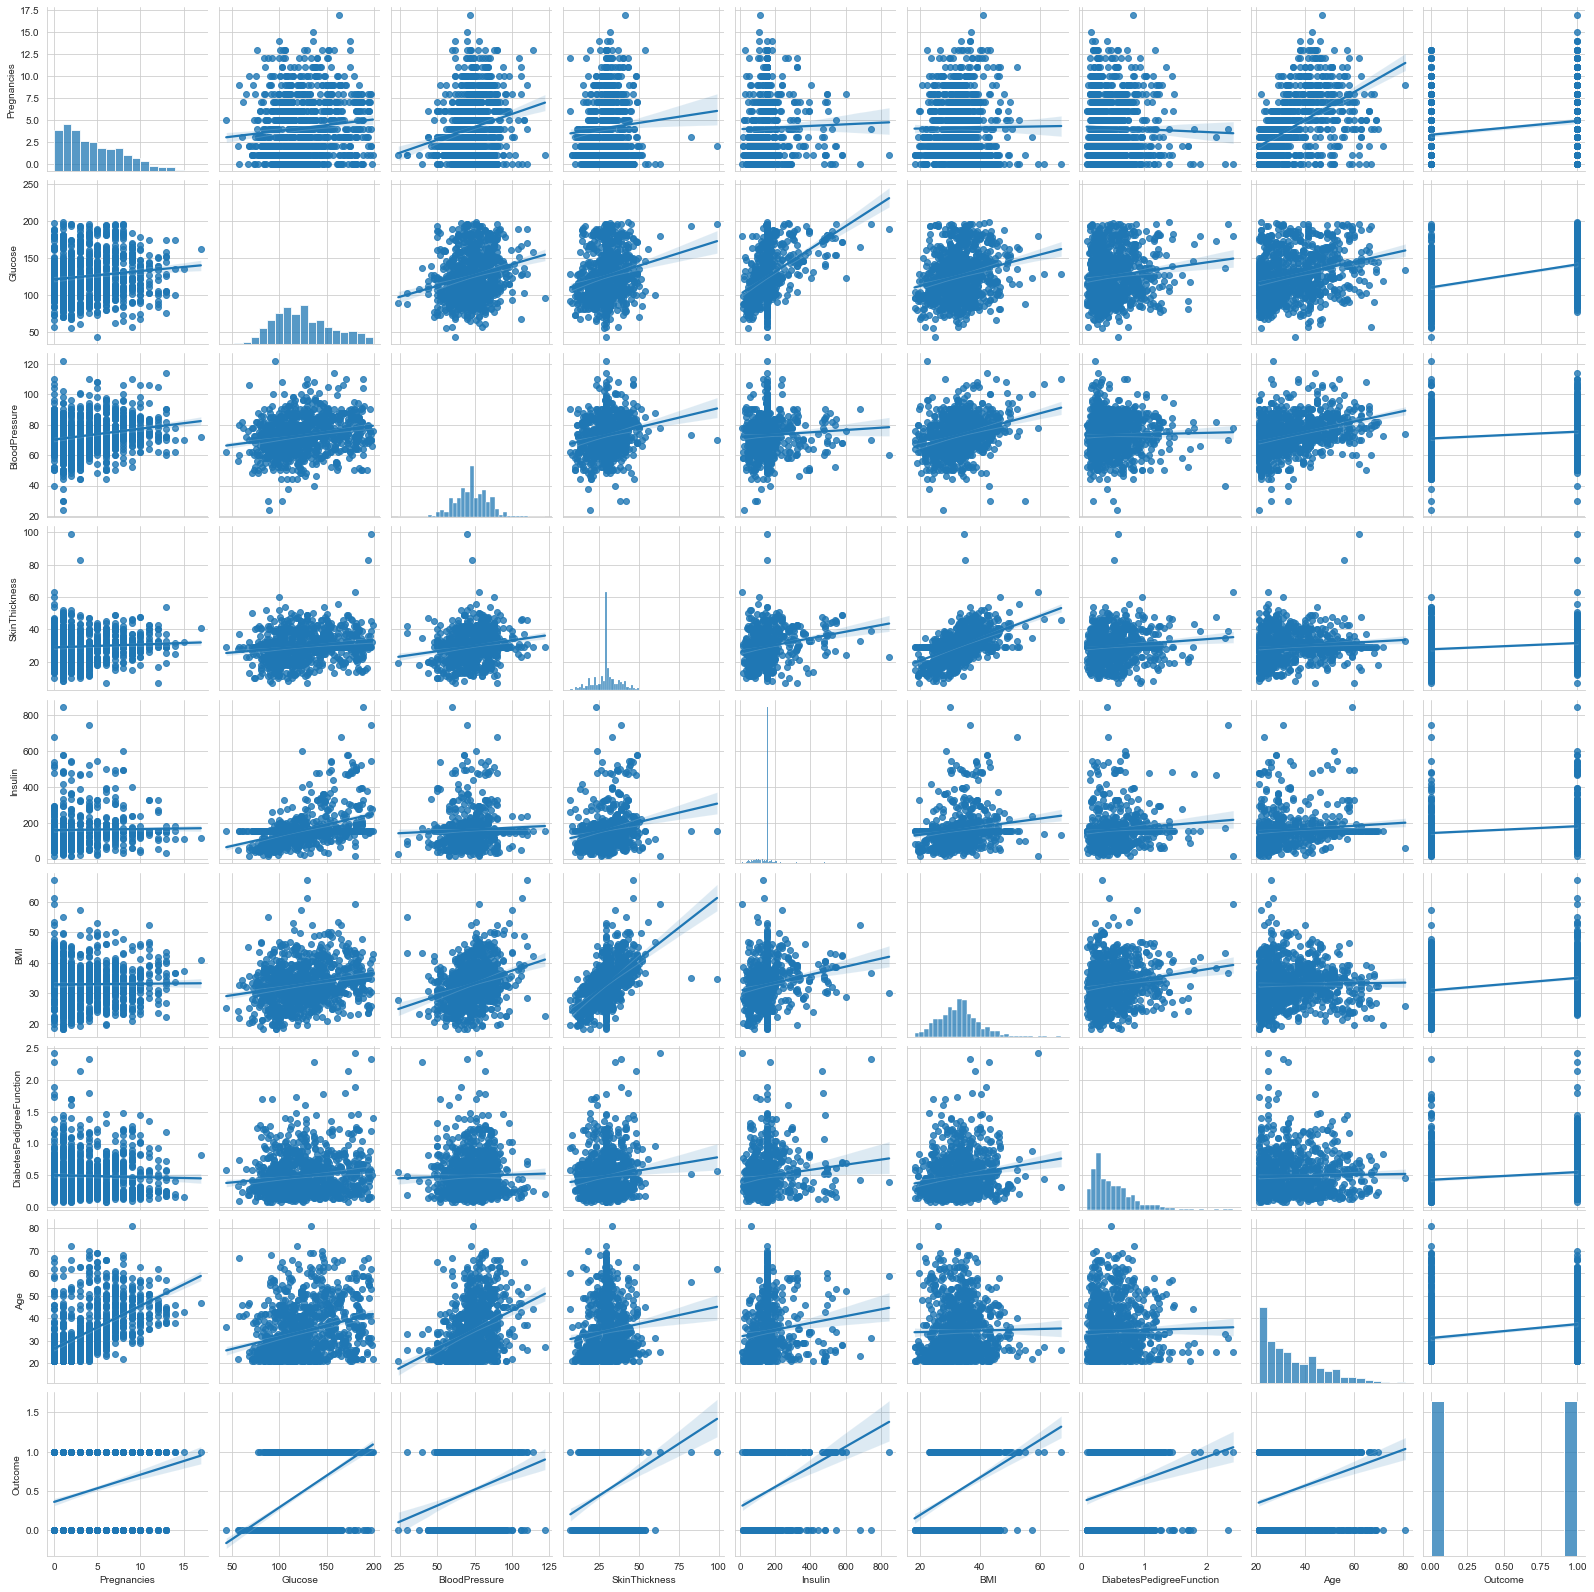

In [45]:
sns.pairplot(data=df_resample,palette="turbo_r",kind="reg")

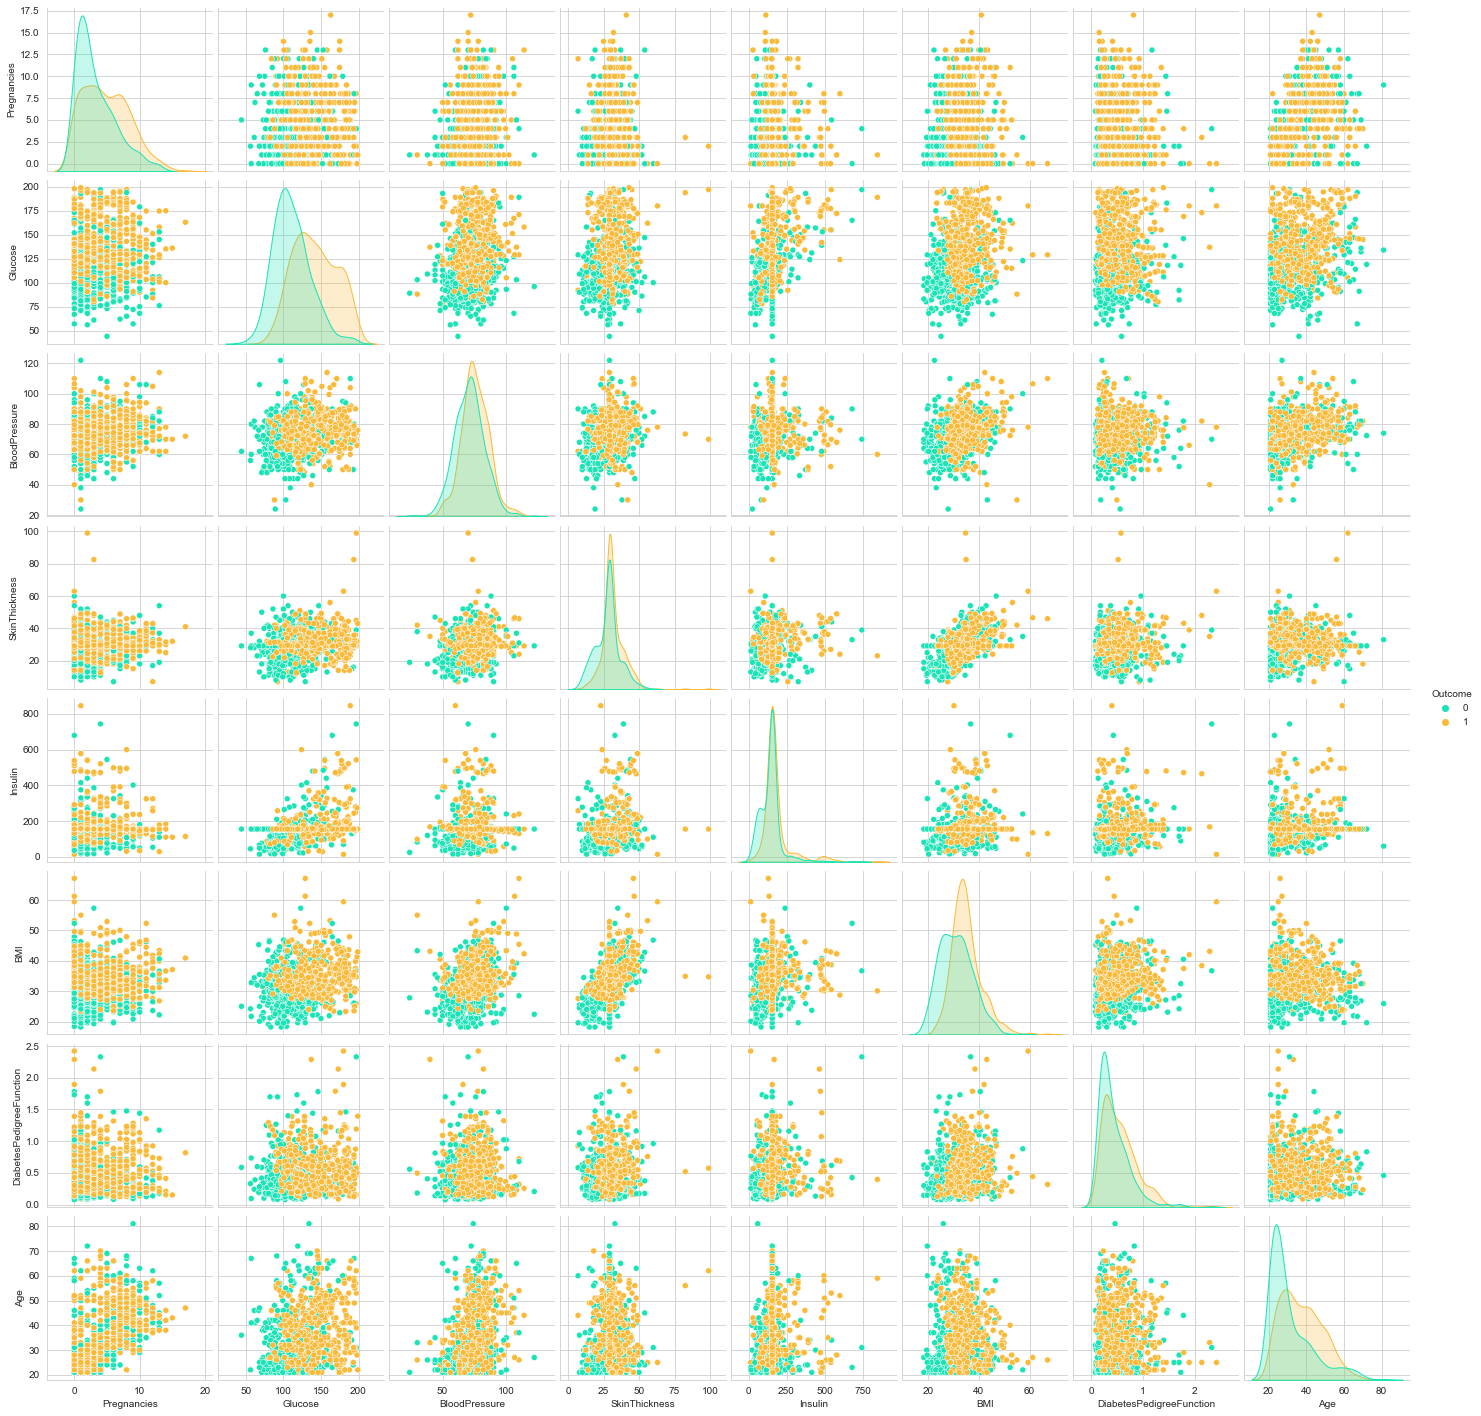

In [46]:
sns.pairplot(data=df_resample,palette="turbo",hue="Outcome")

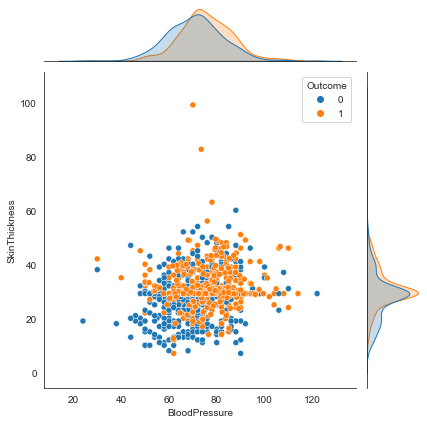

In [47]:
sns.set_style("white")
sns.jointplot(data=df_resample,x="BloodPressure",y="SkinThickness",hue="Outcome")

We have some interesting observations from above scatter plot of pairs of features:

- Glucose alone is impressively good to distinguish between the Outcome classes.
- Age alone is also able to distinguish between classes to some extent.
- It seems none of pairs in the dataset is able to clealry distinguish between the Outcome classes.
- We need to use combination of features to build model for prediction of classes in Outcome.

**<u> 3. Perform correlation analysis. Visually explore it using a heat map:**<u>

In [48]:
df_resample.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120187,0.204869,0.070451,0.023584,0.011822,-0.030676,0.548979,0.233996
Glucose,0.120187,1.000000,0.222102,0.186536,0.427863,0.225069,0.127435,0.277584,0.502471
BloodPressure,0.204869,0.222102,1.000000,0.183681,0.055950,0.295888,0.027030,0.342359,0.191341
SkinThickness,0.070451,0.186536,0.183681,1.000000,0.206797,0.530323,0.110269,0.114110,0.225553
Insulin,0.023584,0.427863,0.055950,0.206797,1.000000,0.172997,0.106826,0.112220,0.221647
BMI,0.011822,0.225069,0.295888,0.530323,0.172997,1.000000,0.161753,0.019286,0.313793
DiabetesPedigreeFunction,-0.030676,0.127435,0.027030,0.110269,0.106826,0.161753,1.000000,0.024623,0.186949
Age,0.548979,0.277584,0.342359,0.114110,0.112220,0.019286,0.024623,1.000000,0.266364
Outcome,0.233996,0.502471,0.191341,0.225553,0.221647,0.313793,0.186949,0.266364,1.000000


<AxesSubplot:>

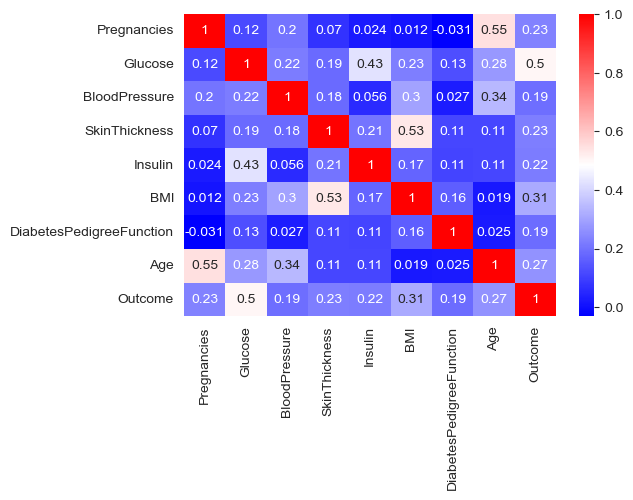

In [49]:
plt.figure(dpi=100)
sns.heatmap(df_resample.corr(),cmap="bwr",annot=True)

Observation:

- In this there is no negative correlation
- If are you high positive correlated feature those are;
	- Age-Pregnacies
    - Outcome- Glucose
    - BMI-Skinthickness

# Week 3:

**<u>Data Modeling:**<u>

**<u>1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process:**<u>

Since this is a classification problem, we will be building all popular classification models for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Naive Bayes

We will use use GridSearchCV with Cross Validation (CV) = 5 for training and testing model which will give us insight about model performance on versatile data. It helps to loop through predefined hyperparameters and fit model on training set. GridSearchCV performs hyper parameter tuning which will give us optimal hyper parameters for each of the model. We will again train model with these optimized hyper parameters and then predict test data to get metrics for comparing all models.

In [50]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resample, df_y_resample, test_size=0.15, random_state =10)

In [52]:
X_train.shape, X_test.shape

((850, 8), (150, 8))

**<u>2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm**<u>

In [206]:
model = []
modelaccuracy = []
modelf1 = []
modelauc = []

- - KNN 

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [55]:
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

In [59]:
accuracy_knn=accuracy_score(y_test,knn_pred)
f1_knn=f1_score(y_test,knn_pred)

In [60]:
print("Model Validation\n")
print("\nAccuracy Score\n",accuracy_knn)
print("\nF1 Score\n",f1_knn)
print("\nClassfication report\n",classification_report(y_test,knn_pred))

Model Validation


Accuracy Score
 0.7733333333333333

F1 Score
 0.7976190476190477

Classfication report
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        68
           1       0.78      0.82      0.80        82

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



In [61]:
knn.score(X_train,y_train)

0.8835294117647059

In [62]:
knn.score(X_test,y_test)

0.7733333333333333

Performance evaluation and optimizing parameters using GridSearchCV:

In [63]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
gs_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(df_X_resample, df_y_resample)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [66]:
gs_knn.best_params_

{'n_neighbors': 3}

In [67]:
gs_knn.best_score_

0.763

In [68]:
# gs_knn.cv_results_
gs_knn.cv_results_['mean_test_score']

array([0.761, 0.763, 0.752, 0.757, 0.759, 0.743, 0.741, 0.751, 0.757,
       0.758, 0.755, 0.755, 0.754, 0.75 ])

In [69]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [70]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn2.score(X_train,y_train)


0.8835294117647059

In [72]:
knn2.score(X_test,y_test)


0.7733333333333333

AUC: 0.823


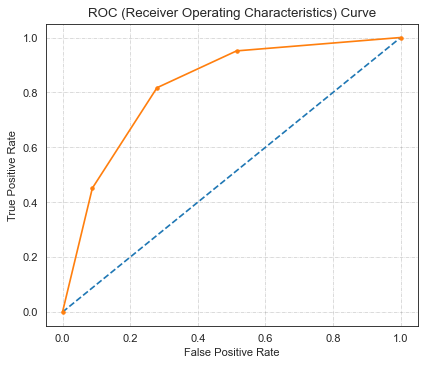

In [73]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)# calculate roc curve
plt.figure(figsize=(6,5),dpi=80)
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True,linestyle="-.",color="grey",alpha=0.5,linewidth=0.5)
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.798 auc_pr=0.848 ap=0.793


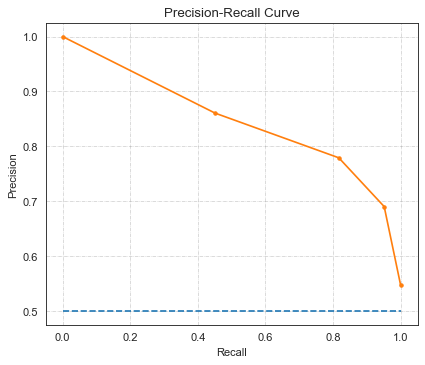

In [74]:
# Precision Recall Curve 

pred_y_test = knn2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.figure(figsize=(6,5),dpi=80)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.grid(True,linestyle="-.",color="grey",alpha=0.5,linewidth=0.5)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [207]:
model.append('KNN')
modelaccuracy.append(accuracy_score(y_test, pred_y_test))
modelf1.append(f1)
modelauc.append(auc_knn)

- - Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=300)

In [77]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [78]:
lr_pred=lr.predict(X_test)

In [79]:
lr.score(X_train,y_train)

0.7529411764705882

In [80]:
lr.score(X_test,y_test)

0.72

Performance evaluation and optimizing parameters using GridSearchCV: Logistic regression does not really have any critical hyperparameters to tune. However we will try to optimize one of its parameters 'C' with the help of GridSearchCV. So we have set this parameter as a list of values form which GridSearchCV will select the best value of parameter.

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [82]:
parameters = {'C':np.logspace(-5, 5, 50)}

In [83]:
gs_lr = GridSearchCV(lr, param_grid = parameters, cv=5, verbose=0)
gs_lr.fit(df_X_resample, df_y_resample)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [84]:
gs_lr.best_params_

{'C': 0.30888435964774846}

In [85]:
gs_lr.best_score_

0.747

In [86]:
lr2=LogisticRegression(C=0.30888435964774846,max_iter=300)
lr2.fit(X_train,y_train)
lr2_pred=lr2.predict(X_test)

In [87]:
lr2.score(X_train,y_train)

0.7505882352941177

In [88]:
lr2.score(X_test,y_test)

0.72

In [89]:
#Checking the Accuracy Score
accuracy_lr=accuracy_score(y_test,lr2_pred)

In [90]:
accuracy_lr

0.72

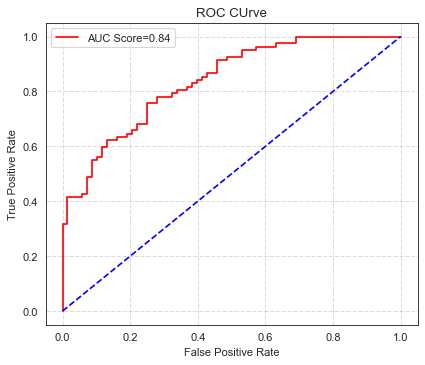

In [91]:
#AUC ROC Curve
probs=lr2.predict_proba(X_test)
probs_lr=probs[:,1]

fpr,tpr,threshold=roc_curve(y_test,probs_lr)
roc_auc_lr=auc(fpr,tpr)
plt.figure(figsize=(6,5),dpi=80)
plt.title("ROC CUrve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,color="r",label="AUC Score=%0.2f"%roc_auc_lr)
plt.plot(fpr,fpr,"b--")
plt.grid(True,linewidth=0.5,linestyle="-.",alpha=0.5,color="grey")
plt.legend()
plt.show()

In [92]:
f1=f1_score(y_test,lr2_pred)

In [208]:
model.append("LR")
modelaccuracy.append(accuracy_score(y_test,lr2_pred))
modelf1.append(f1)
modelauc.append(roc_auc_lr)

- - Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

In [95]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [96]:
dt.score(X_train,y_train)       

1.0

In [97]:
dt.score(X_test,y_test)

0.7866666666666666

**<u>Performance evaluation and optimizing parameters using GridSearchCV:**<u>

In [98]:
parameters = {
    'max_depth':[1,2,3,4,5,None]
}

In [99]:
gs_dt = GridSearchCV(dt, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(df_X_resample, df_y_resample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [100]:
gs_dt.best_params_

{'max_depth': 5}

In [101]:
gs_dt.best_score_

0.757

In [102]:
dt.feature_importances_

array([0.04148205, 0.36198006, 0.11826759, 0.03881715, 0.09051645,
       0.16047932, 0.08780306, 0.10065433])

In [103]:
dt2=DecisionTreeClassifier(max_depth=5)

In [104]:
dt2.fit(X_train,y_train)
dt2_pred=dt2.predict(X_test)

In [105]:
dt2.score(X_train,y_train)

0.8223529411764706

In [106]:
dt2.score(X_test,y_test)

0.7733333333333333

In [107]:
acuuracy_dt2=accuracy_score(y_test,dt2_pred)
f1_dt2=f1_score(y_test,dt2_pred)

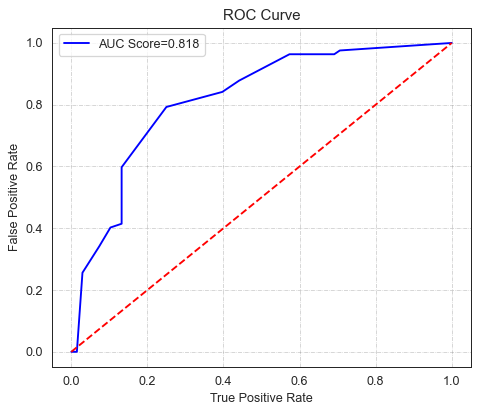

In [120]:
#ROC Curve
probs_dt2=dt2.predict_proba(X_test)
probs_dt2=probs_dt2[:,1]

fpr,tpr,threshold=roc_curve(y_test,probs_dt2)
roc_auc_dt2=auc(fpr,tpr)
plt.figure(figsize=(6,5),dpi=90)
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(fpr,tpr,"b",label="AUC Score=%0.3f"%roc_auc_dt2)
plt.plot(fpr,fpr,"r--")
plt.grid(True,color="grey",linestyle="-.",linewidth=0.5,alpha=0.5)
plt.legend()

f1=0.793 auc_pr=0.706 ap=0.815


Text(0.5, 1.0, 'Precision-Recall Curve')

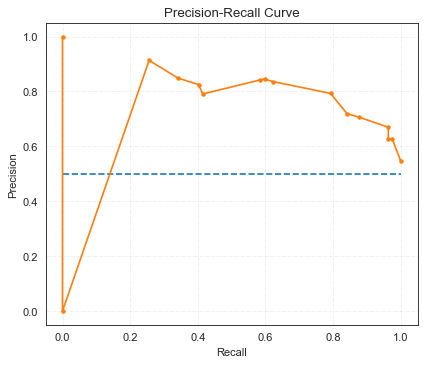

In [127]:
#Precision Recall Curve

pred_y_test = dt2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs_dt2) # calculate precision-recall curve
f1 = f1_score(y_test, dt2_pred)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs_dt2)    # calculate average precision score
plt.figure(figsize=(6,5),dpi=80)
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.grid(True,linestyle="-.",linewidth=0.5,alpha=0.5)
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [209]:
model.append("Decision Tree")
modelaccuracy.append(accuracy_score(y_test,dt2_pred))
modelf1.append(f1)
modelauc.append(roc_auc_dt2)

- - RandomForest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(random_state=1)

In [138]:
rf1.fit(X_train,y_train)
rf1_pred=rf1.predict(X_test)

In [139]:
print(rf1.score(X_train,y_train))
rf1.score(X_test,y_test)

1.0


0.8333333333333334

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [140]:
parameters={"n_estimators":[50,100,150],
           "max_depth":[None,1,3,5],
           "min_samples_leaf":[1,3,5]
           }

In [146]:
gs_rf1=GridSearchCV(estimator=rf1,param_grid=parameters,cv=5,verbose=0)
gs_rf1.fit(df_X_resample,df_y_resample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [147]:
gs_rf1.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

In [148]:
gs_rf1.best_score_

0.8240000000000001

In [151]:
rf2=RandomForestClassifier(max_depth=None,min_samples_leaf=1,n_estimators=50)

In [152]:
rf2.fit(X_train,y_train)
rf2_pred=rf2.predict(X_test)

ROC Curve
AUC_Score=0.91


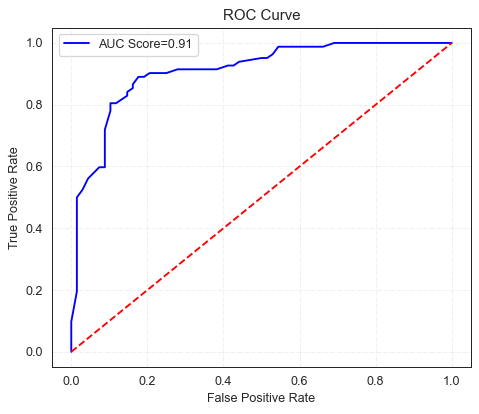

In [157]:
print("ROC Curve")
probs_rf2=rf2.predict_proba(X_test)
probs_rf2=probs_rf2[:,1]

fpr,tpr,threshold=roc_curve(y_test,probs_rf2)
roc_auc_rf2=auc(fpr,tpr)
print("AUC_Score=%3.2f"%roc_auc_rf2)
plt.figure(figsize=(6,5),dpi=90)
plt.plot(fpr,tpr,"b",label="AUC Score=%0.2f"%roc_auc_rf2)
plt.plot(fpr,fpr,"r--")
plt.grid(True,linestyle="-.",linewidth=0.5,alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

Text(0, 0.5, 'Precision')

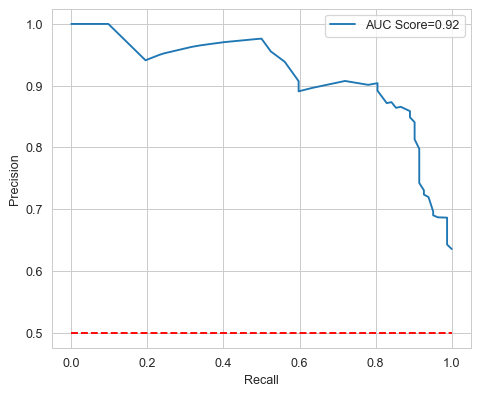

In [173]:
#Precision Recall Curve

precision,recall,threshold=precision_recall_curve(y_test,probs_rf2)
pr_auc_rf2=auc(recall,precision)

sns.set_style("whitegrid")
plt.figure(figsize=(6,5),dpi=90)
plt.plot(recall,precision,label="AUC Score=%0.2f"%pr_auc_rf2)
plt.plot([0,1],[0.5,0.5],"r--")
plt.legend(loc="best")
plt.xlabel("Recall")
plt.ylabel("Precision")

In [210]:
model.append("RF")
modelaccuracy.append(accuracy_score(y_test,rf2_pred))
modelf1.append(f1_score(y_test,rf2_pred))
modelauc.append(roc_auc_rf2)

- - - **<u>Support Vector Machine(SVM) Algorithm<u>**

In [176]:
from sklearn.svm import SVC

In [180]:
svm1=SVC(kernel="rbf")

In [181]:
svm1.fit(X_train,y_train)
svm1_pred=svm1.predict(X_test)

**<u>Performance evaluation and optimizing parameters using GridSearchCV:**<u>

In [182]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [184]:
gs_svm = GridSearchCV(estimator=svm1, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(df_X_resample, df_y_resample)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [185]:
gs_svm.best_params_

{'C': 5, 'gamma': 0.005}

In [186]:
gs_svm.best_score_

0.806

In [187]:
svm2 = SVC(kernel='rbf', C=5, gamma=0.005, probability=True)

In [188]:
svm2.fit(X_train, y_train)
svm2_pred=svm2.predict(X_test)

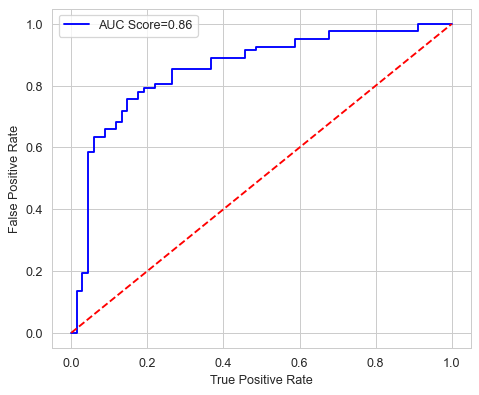

In [190]:
#ROC Curve

svm2_probs=svm2.predict_proba(X_test)
svm2_probs=svm2_probs[:,1]

fpr,tpr,threshold=roc_curve(y_test,svm2_probs)
roc_auc_svm2=auc(fpr,tpr)
plt.figure(figsize=(6,5),dpi=90)
plt.plot(fpr,tpr,"b",label="AUC Score=%0.2f"%roc_auc_svm2)
plt.plot(fpr,fpr,"r--")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.legend()

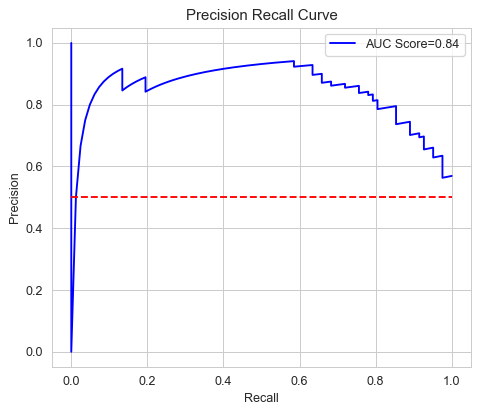

In [191]:
#Precision Recall Curve

precision,recall,threshold=precision_recall_curve(y_test,svm2_probs)
pr_auc_svm2=auc(recall,precision)

plt.figure(figsize=(6,5),dpi=90)
plt.plot(recall,precision,"b",label="AUC Score=%0.2f"%pr_auc_svm2)
plt.plot([0,1],[0.5,0.5],"r--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.legend()

In [211]:
model.append("SVM")
modelaccuracy.append(accuracy_score(y_test,svm2_pred))
modelf1.append(f1_score(y_test,svm2_pred))
modelauc.append(roc_auc_svm2)

In [214]:
model_summary = pd.DataFrame(zip(model,modelaccuracy,modelf1,modelauc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

In [215]:
model_summary

,accuracy,f1_score,auc
model,,,
KNN,0.773333,0.792683,0.822633
LR,0.720000,0.792683,0.836980
Decision Tree,0.773333,0.792683,0.817880
RF,0.853333,0.865854,0.909433
SVM,0.786667,0.794872,0.855093


Overall, based on these metrics, the **<u>Random Forest<u>** model appears to be the best performing model among the given models for the given dataset.

In [219]:
df.to_csv("Final_heathcare_data.csv",index=False)